In [17]:
#import libraries 
from bs4 import BeautifulSoup
import pandas as pd

#url = https://cryptoslam.io/ethereum

#read the text file 
with open('ether_sales.txt', 'r') as f:
    html_content = f.read()

# create a parser
html_soup = BeautifulSoup(html_content, 'html.parser')

#create variables to store the data
months = []
sales = []
unique_buyers = []
unique_sellers = []
transactions = []
avg_sale= []

table_container = html_soup.find('table', { 'id': 'table'})
table_body = table_container.findChildren('tbody')
row_containers = table_body[0].findChildren(['tr'])


for container in row_containers:
    columns_data = container.find_all('td')
    
    
    if(columns_data):
      months.append(str(columns_data[1].text))
      sales_data = columns_data[2].string
      sales_data = float(sales_data[1:].replace(",", ""))
      sales.append(sales_data)
      unique_buyers.append(int(columns_data[3].string.replace(",", "")))
      unique_sellers.append(int(columns_data[4].string.replace(",", "")))
      transactions.append(int(columns_data[5].string.replace(",", "")))
      avg_sales_data = columns_data[6].string
      avg_sales_data = float(avg_sales_data[1:].replace(",", ""))
      avg_sale.append(avg_sales_data)
   

# create a dataframe 
ether_sales_df = pd.DataFrame({'months': months,
        'sales': sales,
        'unique_buyers': unique_buyers,
        'unique_sellers': unique_sellers,
        'transactions': transactions,
        'avg_sale': avg_sale
        })

#save it as a json file
ether_sales_df.to_json('nft_sales_ether.json')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nft_ether_df = pd.read_json('nft_sales_ether.json')
nft_ether_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   months          58 non-null     object 
 1   sales           58 non-null     float64
 2   unique_buyers   58 non-null     int64  
 3   unique_sellers  58 non-null     int64  
 4   transactions    58 non-null     int64  
 5   avg_sale        58 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 3.2+ KB


In [28]:
nft_ether_df = nft_ether_df.drop([57])

In [71]:
nft_ether_df.head()

,months,sales,unique_buyers,unique_sellers,transactions,avg_sale
0,"June, 2017",11569.76,33,32,193,59.95
1,"July, 2017",89111.22,61,57,613,145.37
2,"August, 2017",15133.07,36,31,113,133.92
3,"September, 2017",5154.35,22,19,63,81.82
4,"October, 2017",3041.35,17,11,52,58.49


In [76]:
nft_graph_data = nft_ether_df[19:]

In [77]:
nft_graph_data.head()

,months,sales,unique_buyers,unique_sellers,transactions,avg_sale
19,"January, 2019",160804.07,2095,1396,20913,7.69
20,"February, 2019",110256.57,1718,1182,17831,6.18
21,"March, 2019",348814.54,2108,1580,24645,14.15
22,"April, 2019",325604.44,1960,1249,17113,19.03
23,"May, 2019",298802.94,2198,1985,18448,16.20


In [46]:
import seaborn as sns
sns.set(style="darkgrid")


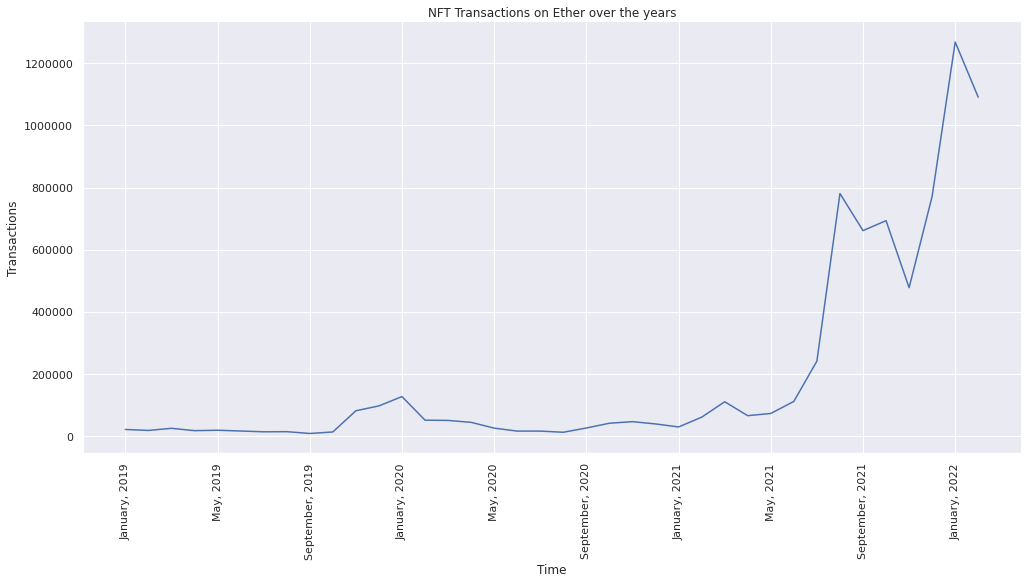

In [80]:

plot = sns.relplot(
    data=nft_graph_data, 
    x="months", y="transactions", 
    height=7, aspect=2, 
    kind="line"
    ).set(title="NFT Transactions on Ether over the years",
      ylabel="Transactions",
      xlabel="Time"
      )

plot.set_xticklabels( step = 4, rotation = 90)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

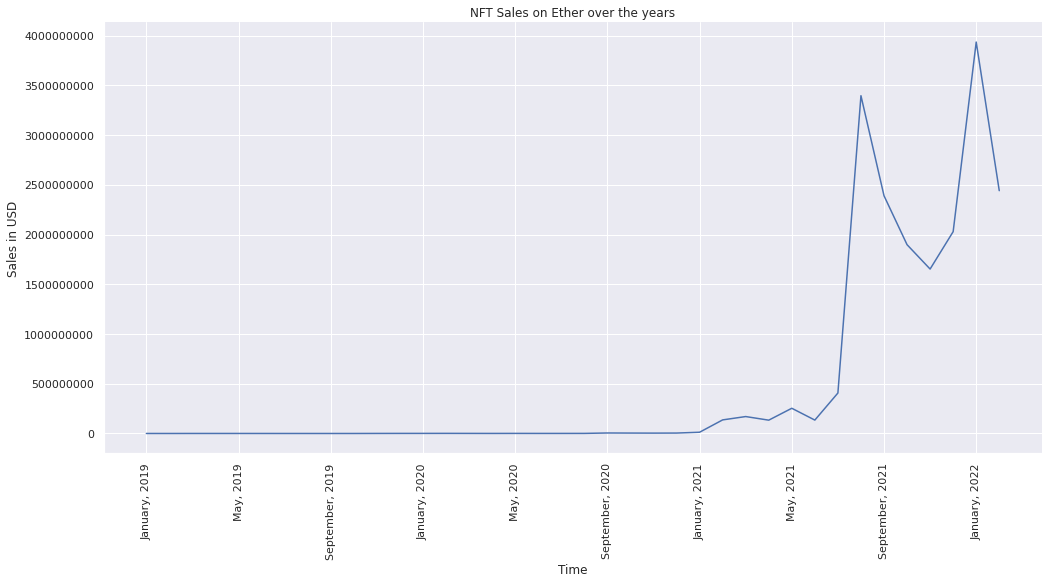

In [81]:

plot = sns.relplot(
    data= nft_graph_data, 
    x="months", y="sales", 
    height=7, aspect=2, 
    kind="line"
    ).set(title="NFT Sales on Ether over the years",
      ylabel="Sales in USD",
      xlabel="Time"
      )

plot.set_xticklabels( step = 4, rotation = 90)
plt.ticklabel_format(style='plain', axis='y')

plt.show()